# PROBLEM SET 3

QUESTION 1

In [1]:
import pandas as pd

# Import the dataset from this address.
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, delimiter='|', index_col='user_id')

# Discover what is the mean age per occupation
mean_age = users.groupby('occupation')['age'].mean()
print(mean_age)

# Discover the Male ratio per occupation and sort it from the most to the least
# Create a new column 'gender_num' where male=1 and female=0
users['gender_num'] = users['gender'].apply(lambda x: 1 if x == 'M' else 0)

# Male ratio per occupation
male_ratio = users.groupby('occupation')['gender_num'].mean()

# Sort male ratio from the most to the least
male_ratio_sorted = male_ratio.sort_values(ascending=False)

print(male_ratio_sorted)

# For each occupation, calculate the minimum and maximum ages
# Minimum and maximum age per occupation
min_age = users.groupby('occupation')['age'].min()
max_age = users.groupby('occupation')['age'].max()

# Combine the two series into a single dataframe
min_max_age = pd.concat([min_age, max_age], axis=1)

print(min_max_age)

# For each combination of occupation and sex, calculate the mean age
mean_age_occ_gender = users.groupby(['occupation', 'gender'])['age'].mean()

print(mean_age_occ_gender)


# Total number of people per occupation
total_people = users.groupby('occupation')['gender'].count()

# Number of male and female people per occupation
gender_people = users.groupby(['occupation', 'gender'])['gender'].count()

# Calculate percentage of male and female people per occupation
gender_percent = gender_people.div(total_people, level='occupation') * 100

print(gender_percent)


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.57

QUESTION 2

In [2]:
import pandas as pd




import pandas as pd

url = "https://github.com/jokecamp/FootballData/blob/master/UEFA_European_Championship/Euro%202012/Euro%202012%20stats%20TEAM.csv?raw=true"
euro12 = pd.read_csv(url)

goals = euro12["Goals"]
print(goals)

num_cols = euro12.shape[1]
print("Number of columns: ", num_cols)

discipline = euro12[["Team", "Yellow Cards", "Red Cards"]]
print(discipline)

print("Number of columns: ", num_cols)
discipline = euro12[["Team", "Yellow Cards", "Red Cards"]]
discipline = discipline.sort_values(["Red Cards", "Yellow Cards"], ascending=False)
mean_yellow_cards = euro12["Yellow Cards"].mean()
print("Mean Yellow Cards per Team: ", mean_yellow_cards)
high_scoring_teams = euro12[euro12["Goals"] > 6]["Team"]
g_teams = euro12[euro12["Team"].str.startswith("G")]["Team"]
first_seven = euro12.iloc[:, :7]
all_but_last_three = euro12.iloc[:, :-3]
shooting_accuracy = euro12.loc[euro12["Team"].isin(["England", "Italy", "Russia"]), ["Team", "Shooting Accuracy"]]


0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64
Number of columns:  35
                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine

QUESTION 3

In [3]:
import pandas as pd
import numpy as np

# Step 2
s1 = pd.Series(np.random.randint(1, 5, size=100))
s2 = pd.Series(np.random.randint(1, 4, size=100))
s3 = pd.Series(np.random.randint(10000, 30001, size=100))

# Step 3
df = pd.concat([s1, s2, s3], axis=1)

# Step 4
df.columns = ["bedrs", "bathrs", "price_sqr_meter"]

# Step 5
bigcolumn = pd.concat([s1, s2, s3], axis=0)

# Step 6
print("Is bigcolumn going only until index 99? ", bigcolumn.index.max() == 99)

# Step 7
bigcolumn = bigcolumn.reset_index(drop=True)
bigcolumn.index.name = "idx"
bigcolumn = bigcolumn.reset_index()

print(bigcolumn.head())


Is bigcolumn going only until index 99?  True
   idx  0
0    0  2
1    1  1
2    2  1
3    3  4
4    4  2


QUESTION 4

In [28]:
import pandas as pd

# Step 2: Read the data from the file
filename = r"C:\Users\malke\Downloads\wind.txt"

data = pd.read_csv(filename, sep='\s+', skiprows=[0], names=['Yr', 'Mo', 'Dy', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL'])

# Step 3: Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data['date'] = pd.to_datetime(data[['Dy', 'Mo', 'Yr']], dayfirst=True)
data = data.drop(['Yr', 'Mo', 'Dy'], axis=1)
data = data.set_index('date')



# Step 4: Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
def fix_year(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return pd.Timestamp(year=year, month=x.month, day=x.day)

data.index = data.index.map(fix_year)

# Step 5: Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data.index = pd.to_datetime(data.index, format='%y-%m-%d')

# Step 6: Compute how many values are missing for each location over the entire record.
missing_values_count = data.isnull().sum()

# Step 7: Compute how many non-missing values there are in total.
non_missing_values_count = data.notnull().sum().sum()

# Step 8: Calculate the mean windspeeds of the windspeeds over all the locations and all the times. A single number for the entire dataset.
mean_windspeed = data.mean().mean()

# Step 9: Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location.
loc_stats = pd.DataFrame({'min': data.min(), 'max': data.max(), 'mean': data.mean(), 'std': data.std()})

# Step 10: Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.
day_stats = pd.DataFrame({'min': data.min(axis=1), 'max': data.max(axis=1), 'mean': data.mean(axis=1), 'std': data.std(axis=1)})

# Step 11: Find the average windspeeds across all the locations at each day. A different set of numbers for each day.
daily_average = data.mean(axis=1)

# Step 12: Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
january_data = data[data.index.month == 1]
january_mean = january_data.mean()

# Step 13: Downsample the record to a yearly frequency for each location.
yearly_data = data.resample('AS').mean()

# Step 14: Downsample the record to a monthly frequency for each location.
monthly_data = data.resample('MS').mean()

# Step 15: Downsample the record to a weekly frequency for each location and calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (as(assume that the first week starts on January 2 1961) for the first 52 weeks.
weekly_data = data.resample('W', closed='left', label='left').mean()
weekly


ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

QUESTION 5

In [5]:
import pandas as pd

# Import the dataset from this address.
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

# See the first 10 entries
print(chipo.head(10))

# What is the number of observations in the dataset?
print(len(chipo))

# What is the number of columns in the dataset?
print(len(chipo.columns))

# Print the name of all the columns.
print(chipo.columns)

# How is the dataset indexed?
print(chipo.index)

# Which was the most-ordered item?
item_counts = chipo['item_name'].value_counts()
print(item_counts.index[0])

# For the most-ordered item, how many items were ordered?
print(item_counts.iloc[0])

# What was the most ordered item in the choice_description column?
choice_counts = chipo['choice_description'].value_counts()
print(choice_counts.index[0])

# How many items were ordered in total?
total_items = chipo['quantity'].sum()
print(total_items)

# Turn the item price into a float, check the item price type, create a lambda function and change the type of item price, check the item price type.
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print(chipo['item_price'].dtype)

# How much was the revenue for the period in the dataset?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(revenue)

# How many orders were made in the period?
num_orders = chipo['order_id'].nunique()
print(num_orders)

# What is the average revenue amount per order?
avg_revenue = revenue / num_orders
print(avg_revenue)

# How many different items are sold?
num_items = chipo['item_name'].nunique()
print(num_items)


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

QUESTION 6

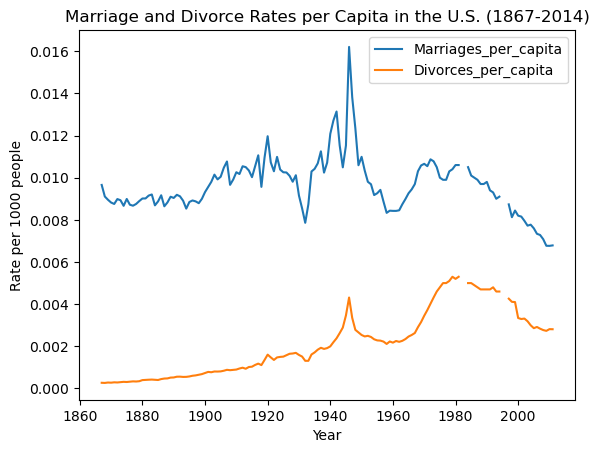

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
divorce = pd.read_csv(r"C:\Users\malke\Downloads\us-marriages-divorces-1867-2014.csv")

# Filter data to include only years between 1867 and 2014
divorce = divorce.loc[(divorce['Year'] >= 1867) & (divorce['Year'] <= 2014)]

# Set year as index
divorce.set_index('Year', inplace=True)

# Calculate divorces per capita and add as a new column
divorce['Divorces_per_capita'] = divorce['Divorces']/divorce['Population']

# Calculate marriages per capita and add as a new column
divorce['Marriages_per_capita'] = divorce['Marriages']/divorce['Population']

# Create line plot
divorce[['Marriages_per_capita', 'Divorces_per_capita']].plot()

# Add title and labels to plot
plt.title('Marriage and Divorce Rates per Capita in the U.S. (1867-2014)')
plt.xlabel('Year')
plt.ylabel('Rate per 1000 people')

# Add legend to plot
plt.legend()

# Show plot
plt.show()


QUESTION 7

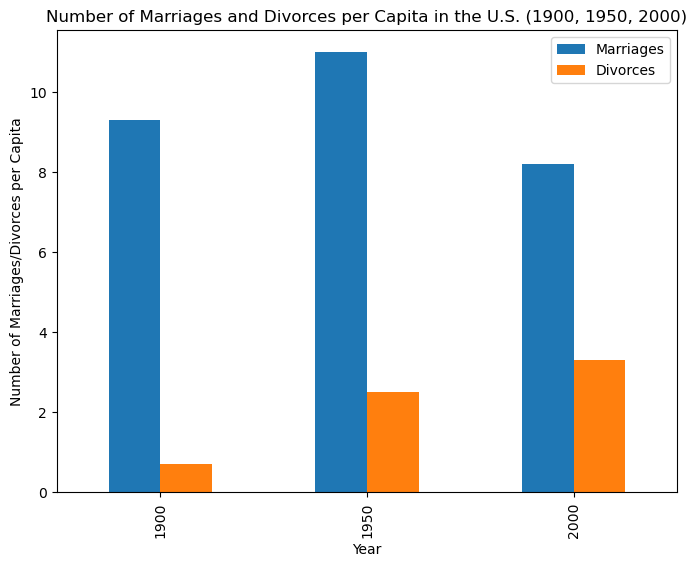

In [7]:
# Step 1
import pandas as pd

# Step 2
us_marriage_divorce = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Step 3
us_marriage_divorce = us_marriage_divorce[us_marriage_divorce['Year'].isin([1900, 1950, 2000])]
us_marriage_divorce = us_marriage_divorce[['Year', 'Marriages_per_1000', 'Divorces_per_1000']]
us_marriage_divorce = us_marriage_divorce.set_index('Year')

# Step 4
us_marriage_divorce.plot(kind='bar', figsize=(8,6))

# Step 5
import matplotlib.pyplot as plt
plt.title('Number of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xlabel('Year')
plt.ylabel('Number of Marriages/Divorces per Capita')
plt.legend(['Marriages', 'Divorces'])
plt.show()


QUESTION 8

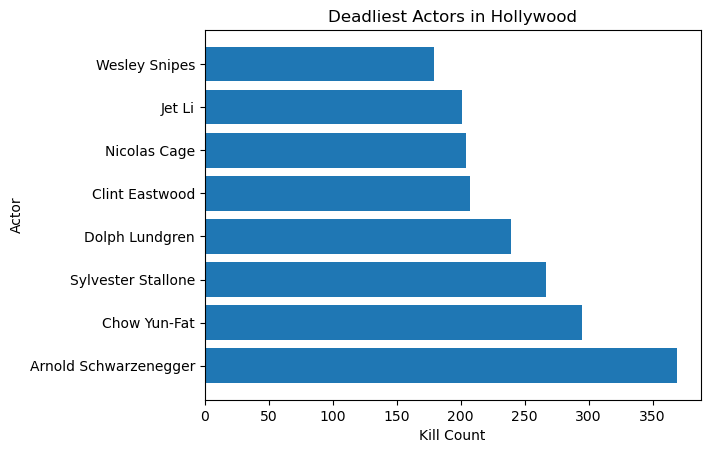

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1
data = {'Actor': ['Arnold Schwarzenegger', 'Chow Yun-Fat', 'Clint Eastwood', 'Dolph Lundgren', 'Jet Li', 'Nicolas Cage', 'Sylvester Stallone', 'Wesley Snipes'], 'Kill Count': [369, 295, 207, 239, 201, 204, 267, 179]}

# Step 2
actor_kills = pd.DataFrame(data)

# Step 3
actor_kills = actor_kills.sort_values(by='Kill Count', ascending=False)

# Step 4
plt.barh(actor_kills['Actor'], actor_kills['Kill Count'])

# Step 5
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

# Step 6
plt.show()


QUESTION 9

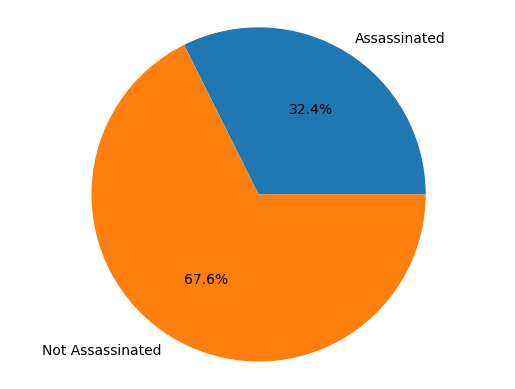

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
roman_emperors = pd.read_csv(r"C:\Users\malke\Downloads\roman-emperor-reigns.csv")

# Calculate the number of emperors that were assassinated
num_assassinated = roman_emperors[roman_emperors['Cause_of_Death'] == 'Assassinated']['Emperor'].count()

# Calculate the number of emperors that were not assassinated
num_not_assassinated = roman_emperors[roman_emperors['Cause_of_Death'] != 'Assassinated']['Emperor'].count()

# Create a list of the two categories
categories = ['Assassinated', 'Not Assassinated']

# Create a list of the corresponding values
values = [num_assassinated, num_not_assassinated]

# Create the pie chart
plt.pie(values, labels=categories, autopct='%1.1f%%')
plt.axis('equal')
plt.show()


QUESTION 10

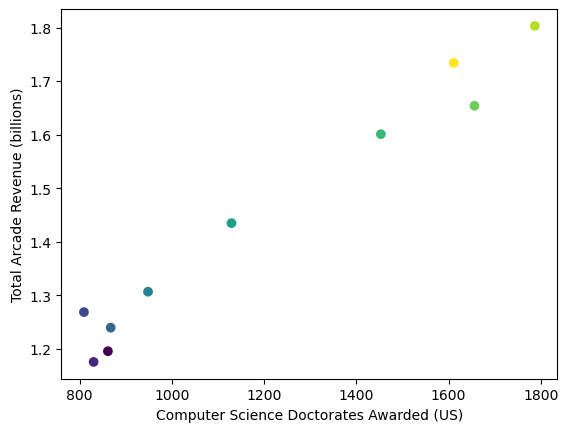

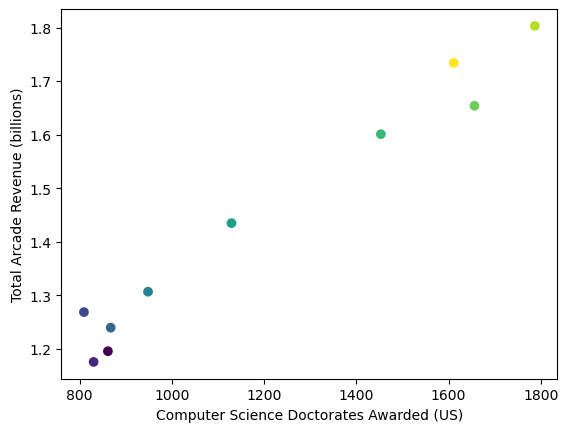

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
arcade_phd = pd.read_csv(r"C:\Users\malke\Downloads\arcade-revenue-vs-cs-doctorates.csv")
plt.scatter(arcade_phd["Computer Science Doctorates Awarded (US)"], arcade_phd["Total Arcade Revenue (billions)"], c=arcade_phd["Year"])
plt.xlabel("Computer Science Doctorates Awarded (US)")
plt.ylabel("Total Arcade Revenue (billions)")
plt.show()
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
arcade_phd = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")

# Create the scatter plot
plt.scatter(arcade_phd["Computer Science Doctorates Awarded (US)"], arcade_phd["Total Arcade Revenue (billions)"], c=arcade_phd["Year"])

# Label the axes
plt.xlabel("Computer Science Doctorates Awarded (US)")
plt.ylabel("Total Arcade Revenue (billions)")

# Display the plot
plt.show()

